# Notebook 02 - Bedrooms data cleaning and fixing

## Objectives
* Clean data
* Evaluate and process missing data
* Fix potential issues with data in feature (BedroomAbvGr)

## Inputs
* inputs/datasets/cleaning/floors.csv

## Outputs
* Clean and fix (missing and potentially wrong) data in given column
* After cleaning is completed, we will save current dataset in outputs/data_cleaning/02_bedrooms.csv
* Add cleaning steps to cleaning PipeLine in jupyter_notebooks/03_Data_Cleaning.ipynb

## Change working directory
In This section we will get location of current directory and move one step up, to parent folder, so App will be accessing project folder.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks/data_cleaning'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("you have set a new current directory")

you have set a new current directory


Confirm new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We need to check current working directory

In [4]:
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We can see that current is **jupyter_notebooks**, as current notebook is in subfolder. We will go one step up to parent directory, what will be our project main directory.
Print out to confirm working directory

In [5]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5'

## Loading Dataset

In [6]:
import pandas as pd

df = pd.read_csv("inputs/datasets/cleaning/floors.csv")
df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854,3.0,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0,3.0,Gd,978,ALQ,284,NaN,460,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,2,920,866,3.0,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,3,961,0,NaN,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,4,1145,0,4.0,Av,655,GLQ,490,0.0,836,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Exploring Data

We check for missing data, it is we will replace with 0

In [12]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna(0)

Adding code to cleaning pipeline:
```python
# filling missing values with 0
df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna(0)
```

We need to convert it to integer

In [13]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('int')

Adding code to cleasning pipeline:

```python
# Converting datatype from float to integer
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('int')
```

Checking is there any buildings, where bedrooms quantity is 0, as it is very unlikely to build house and no bedrooms


In [16]:
issues_bedrooms = df[df['BedroomAbvGr'] == 0]
issues_bedrooms

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
3,3,961,0,0,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
14,14,1253,0,0,No,733,BLQ,520,NaN,352,...,NaN,212.0,213,5,6,1253,NaN,1960,1960,157000
18,18,1114,0,0,No,646,GLQ,468,NaN,576,...,66.0,0.0,102,5,5,1114,NaN,2004,2004,159000
37,37,1297,0,0,No,1213,Rec,84,0.0,498,...,74.0,650.0,0,6,5,1297,NaN,1954,1990,153000
39,39,1152,0,0,NaN,0,NaN,0,NaN,0,...,65.0,0.0,0,5,4,0,NaN,1955,1955,82000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1361,1530,0,0,Av,1274,ALQ,256,NaN,430,...,124.0,16.0,36,5,7,1530,NaN,2005,2005,260000
1372,1372,1108,989,0,Av,975,GLQ,133,NaN,583,...,75.0,0.0,170,6,7,1108,NaN,1998,1998,274300
1394,1394,1500,0,0,Av,1070,GLQ,286,NaN,648,...,53.0,45.0,20,5,7,1356,NaN,2006,2006,246578
1428,1428,804,0,0,No,510,BLQ,278,NaN,240,...,60.0,294.0,0,7,5,788,NaN,1940,1992,119000


We have 105 records, where building has no bedrooms.

Before we proceed, we expect:
1. All houses with NO 2nd floor, we expect to be at least 1 bedroom
2. All houses with 2nd floor, we expect to be at least 2 bedrooms

Based on our expectations we will:
* get mean of bedrooms quantity of all houses with NO 2nd floor
* get mean of bedrooms of all houses with 2nd floor
* get mean of bedrooms in all houses (just to have basic picture)

In [21]:
print("Mean of bedrooms in houses with NO 2nd floor is:", df.loc[df['2ndFlrSF'] == 0, 'BedroomAbvGr'].mean())
print("Mean of bedrooms in houses with  2nd floor is:", df.loc[df['2ndFlrSF'] > 0, 'BedroomAbvGr'].mean())
print("Mean of bedrooms in houses with NO 2nd floor is:", df['BedroomAbvGr'].mean())


Mean of bedrooms in houses with NO 2nd floor is: 2.4313725490196076
Mean of bedrooms in houses with  2nd floor is: 3.03035413153457
Mean of bedrooms in houses with NO 2nd floor is: 2.6746575342465753


We can see that in avreage all houses has minimum 2 rooms, if there is 2nd floor, then it is 3

Let's try to see how bedrooms are distributed across buildings (we compare bedrooms qty and GrLivArea - total living area)

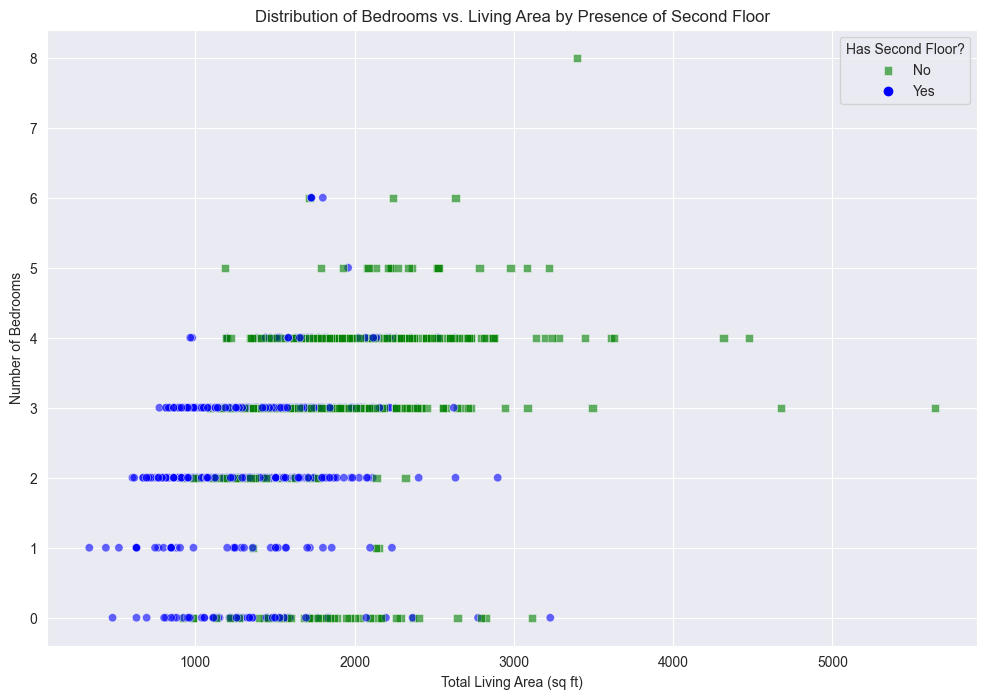

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Has_2nd_Floor'] = (df['2ndFlrSF'] > 0).astype(int)  # 1 if there's a second floor, 0 otherwise

plt.figure(figsize=(12, 8))
sns.scatterplot(x='GrLivArea', y='BedroomAbvGr', hue='Has_2nd_Floor', data=df, palette={0: 'blue', 1: 'green'},
                style='Has_2nd_Floor', markers=['o', 's'], alpha=0.6)
plt.title('Distribution of Bedrooms vs. Living Area by Presence of Second Floor')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Number of Bedrooms')
plt.legend(title='Has Second Floor?', labels=['No', 'Yes'])
plt.show()